In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from utils.vis_tool import walk_through
import warnings

warnings.filterwarnings("ignore")

# Learning Curves

logs/tmaze_passive/50/2024-01-06-22:33:46+465720-465720 2000 1020510
logs/tmaze_passive/50/2024-01-06-22:36:27+471004-471004 2000 1020510
logs/tmaze_passive/50/2024-01-06-22:42:12+478330-478330 2000 1020510
logs/tmaze_passive/50/2024-01-06-23:13:22+499523-499523 2000 1020510
!!incomplete csv logs/tmaze_passive/50/2024-01-09-18:11:40+398293-398293 num steps 191250


!!incomplete csv logs/tmaze_passive/50/2024-01-09-18:22:00+401944-401944 num steps 159120


!!incomplete csv logs/tmaze_passive/50/2024-01-09-18:31:29+408319-408319 num steps 121890


!!incomplete csv logs/tmaze_passive/50/2024-01-09-18:39:55+411189-411189 num steps 133620


logs/tmaze_passive/50/2024-01-09-19:09:53+429605-429605 2000 1020510

 in total: 5
['LRU' 'LSTM' 'MLP']


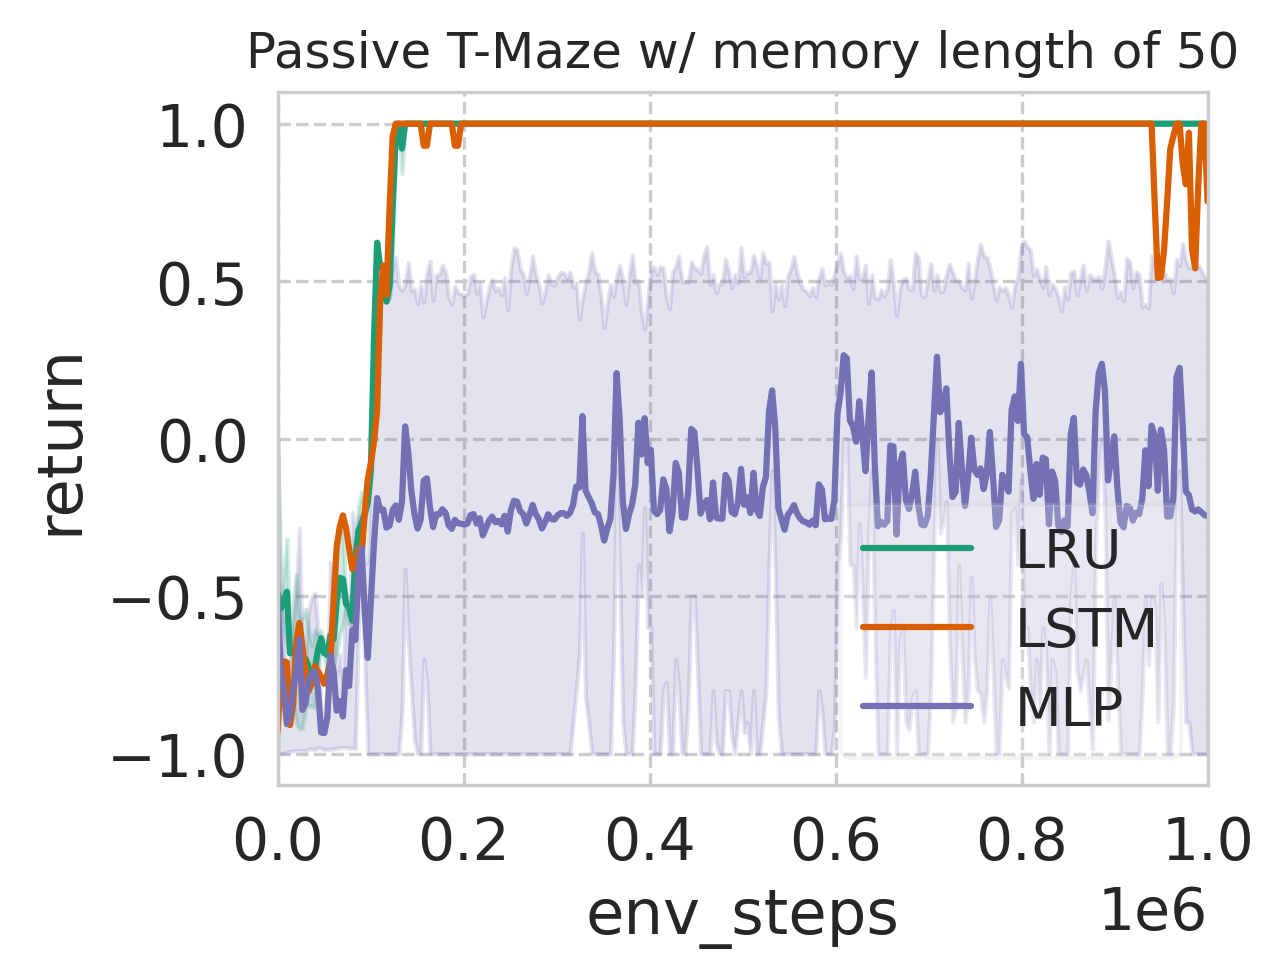


 in total: 0
logs/tmaze_passive/200/2024-01-06-23:29:54+513983-513983 1000 2012010

 in total: 1
['LRU']


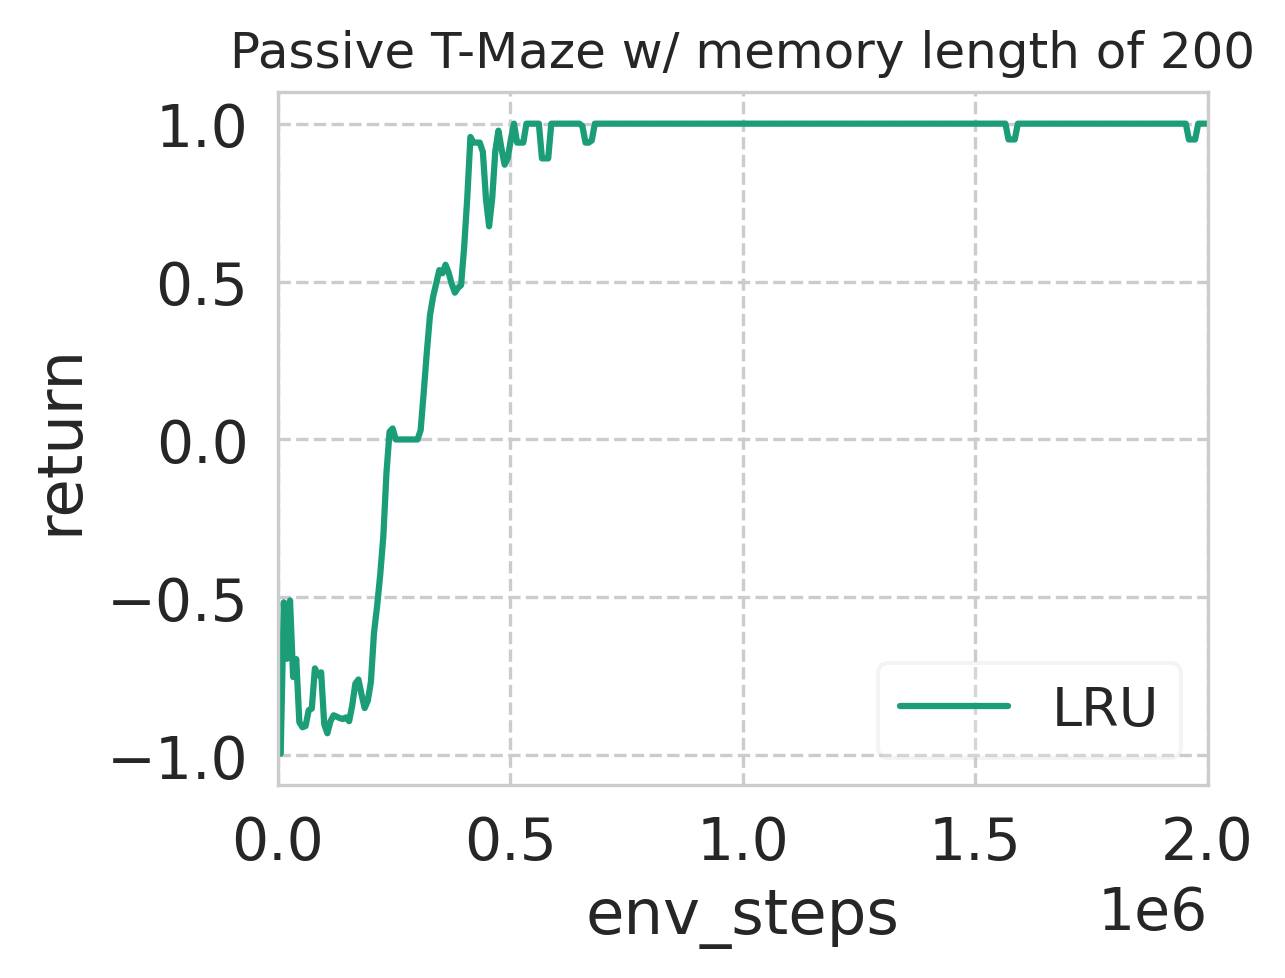

logs/tmaze_passive/500/2023-11-24-11:32:18+3314030-3314030 670 3361710
logs/tmaze_passive/500/2024-01-06-23:28:08+510180-510180 595 2985960

 in total: 2
['GPT' 'LRU']


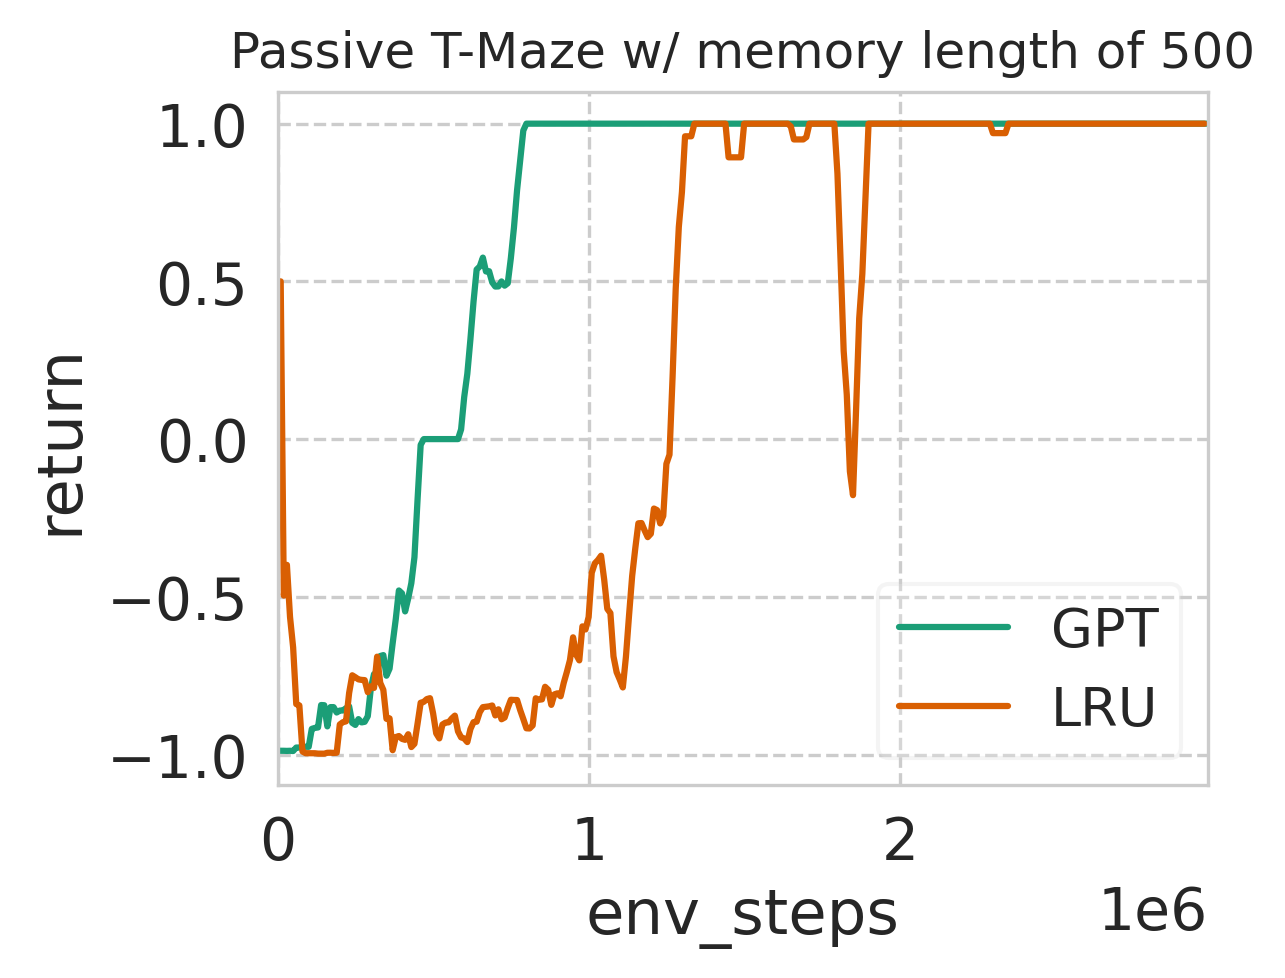


 in total: 0

 in total: 0

 in total: 0
logs/tmaze_passive/1500/2023-11-23-22:10:13+3290085-3290085 477 7174780
!!incomplete csv logs/tmaze_passive/1500/2024-01-07-09:27:26+555265-555265 num steps 600400


!!incomplete csv logs/tmaze_passive/1500/2024-01-07-21:29:55+17931-17931 num steps 885590


logs/tmaze_passive/1500/2024-01-08-18:42:20+276344-276344 215 3242160
logs/tmaze_passive/1500/2024-01-09-18:49:05+414990-414990 815 12248160

 in total: 3
['GPT' 'LRU' 'MLP']


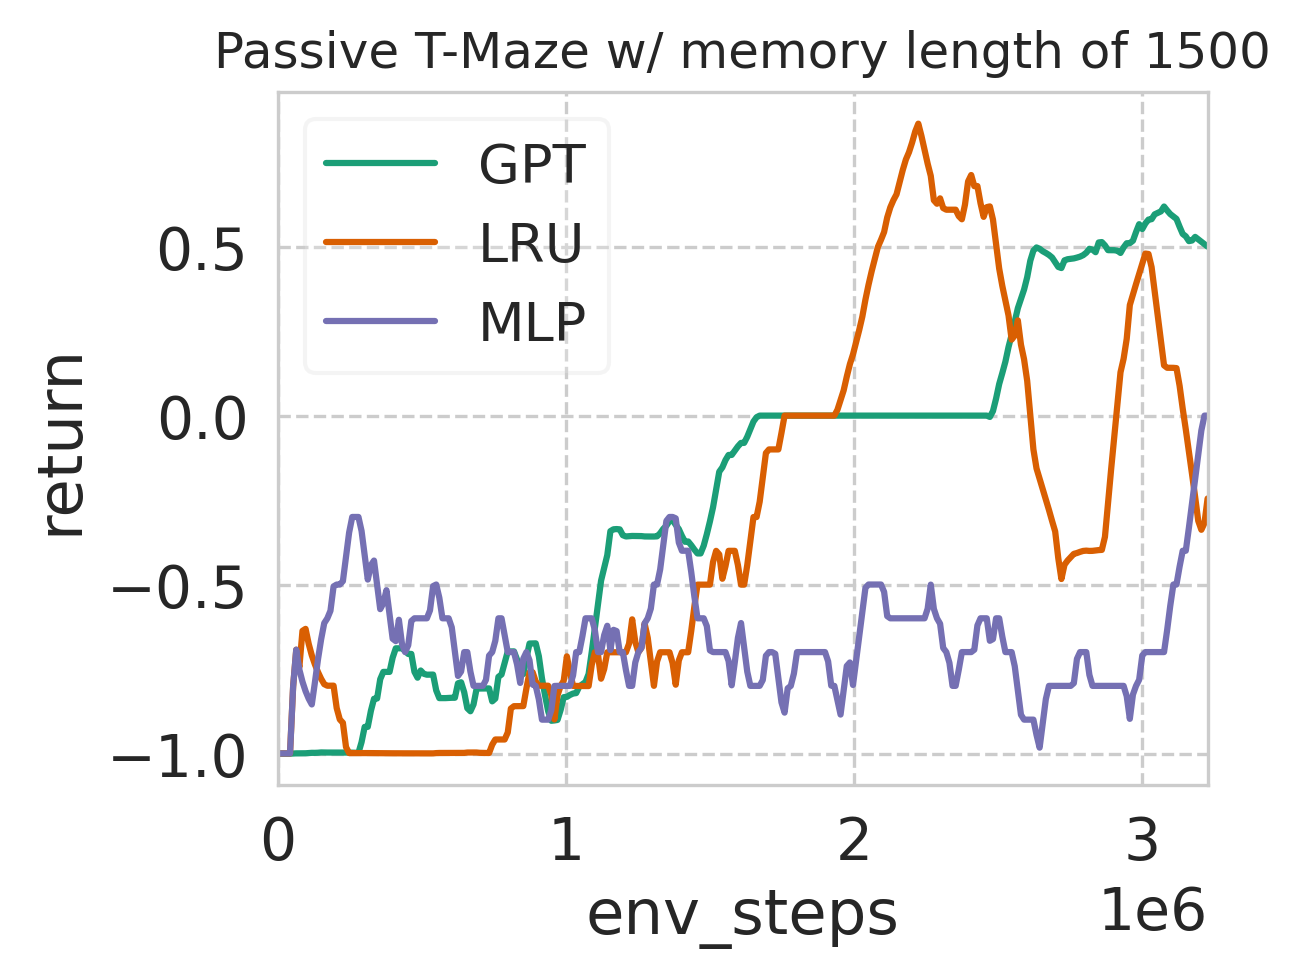

In [15]:
sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 13  # 10
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.loc"] = "best"
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.offset_threshold"] = 1
# plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Liberation Serif"]
plt.rcParams["text.usetex"] = False

separate_legend = False  # False  #

ablation = ""  # "gpt" # ,"lstm" #
hue = (
    # "config_rl.algo"
    "seq"
    # "n_layer"
)
style = None


def query_fn(flags):
    if ablation != "":
        if flags["config_seq"]["model"]["seq_model_config"]["name"] != ablation:
            return False

    return True


for env_len, end in zip(
    [50, 100, 200, 500, 750, 1000, 1250, 1500], [1e6, 2e6, 2e6, 2988465, 6e6, 8e6, 1e7, 3227150]
):
    env_name = "Passive T-Maze"
    path = f"logs/tmaze_passive/{env_len}"
    title_tag = "memory length"
    metric = "return"

    # for env_len, end in zip([20, 50, 100, 250, 500], [0.8e6, 2e6, 4e6, 7e6, 7e6]):
    #     env_name = "Active T-Maze"
    #     path = f"logs/tmaze_active/{env_len}"
    #     title_tag = "credit assignment length"
    #     metric =   "return"

    # for env_len, end in zip([60, 120, 250, 500, 750, 1000],
    #             [3.6e6, 4e6, 4e6, 5.3e6, 7.8e6, 10e6]):
    #     env_name = "Passive Visual Match"
    #     path = f"logs/visual_match/{env_len}"
    #     title_tag = "memory length"
    #     metric = "return" #   "success"

    # for env_len, end in zip([60, 120, 250, 500], [3.4e6, 5.8e6, 7.5e6, 7.5e6]):
    #     env_name = "Key-to-Door"
    #     path = f"logs/key_to_door/{env_len}"
    #     title_tag = "credit assignment length"
    #     metric =   "success"
    try:
        df = walk_through(
            path,
            metric,
            query_fn,
            start=0,
            end=end,
            steps=300,
            window=10,
        )
        df = df.fillna(False)
    except:
        continue

    # custom functions to reduce flags
    df["seq"] = df["config_seq.model.seq_model_config.name"].str.upper()
    print(df["seq"].unique())
    if "config_seq.model.seq_model_config.n_layer" in df:
        df["n_layer"] = df["config_seq.model.seq_model_config.n_layer"]

    ans = sns.lineplot(
        data=df,
        x="env_steps",
        y=metric,
        palette="Dark2",
        hue=hue,
        hue_order=np.sort(df[hue].unique()) if hue is not None else None,
        style=style,
        style_order=np.sort(df[style].unique()) if style is not None else None,
    )
    if "loss" in metric:
        ans.set_yscale("log")
    if separate_legend:
        ans.legend().set_visible(False)
    else:
        ans.legend(framealpha=0.2)  # must use the returned ans

    plt.xlim(0, end)
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))  # default [-5, 6]
    plt.title(f"{env_name} w/ {title_tag} of {env_len}")

    os.makedirs(
        "plts", exist_ok=True
    )  # use flattened folder for easy upload in overleaf
    plt.savefig(
        f"plts/{path.split('/')[-2]}-{env_len}_{metric}_{ablation}_{hue}_{style}"
        + ("" if separate_legend else "_leg")
        + ".jpg",
        bbox_inches="tight",
        pad_inches=0.03,
    )  # default 0.1
    plt.show()
    plt.close()

# Aggregation Plots

In [ ]:
sns.set_style("whitegrid", {"grid.linestyle": "--"})
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (4, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.loc"] = "best"
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.offset_threshold"] = 1
# plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Liberation Serif"]
plt.rcParams["text.usetex"] = True


def query_fn(flags):
    if ablation != "":
        if flags["config_seq"]["model"]["seq_model_config"]["name"] != ablation:
            return False

    # if ablation == "":
    #     return flags['config_seq']['model']['seq_model_config']['n_layer'] == 1 # 2, 4

    return True


ablation = ""  # "gpt" # "lstm"

hue = (
    "seq"
    # "n_layer"
)
style = hue

dfs = []

for env_len, end in zip(
    [50, 100, 250, 500, 750, 1000, 1250, 1500], [1e6, 2e6, 4e6, 4e6, 6e6, 8e6, 1e7, 1e7]
):
    env_name = "Passive T-Maze"
    path = f"logs/tmaze_passive/{env_len}"
    metric = "return"
    x_axis = r"(Easy) $\leftarrow$ Memory length $\rightarrow$ (Hard)"
    y_label = "Optimal agent w/o memory"
    y_value = 0.5
    show_legend = True

    # for env_len, end in zip([20, 50, 100, 250, 500], [0.8e6, 2e6, 4e6, 7e6, 7e6]):
    #     env_name = "Active T-Maze"
    #     path = f"logs/tmaze_active/{env_len}"
    #     metric = "return"
    #     x_axis = r"(Easy) $\leftarrow$ Credit assignment length $\rightarrow$ (Hard)"
    #     y_label = "Optimal agent w/o credit assignment"
    #     y_value = 0.5
    #     show_legend = True

    # for env_len, end in zip([60, 120, 250, 500, 750, 1000],
    #             [3.6e6, 4e6, 4e6, 5.3e6, 7.8e6, 10e6]):
    #     env_name = "Passive Visual Match"
    #     path = f"logs/visual_match/{env_len}"
    #     metric = "success"
    #     x_axis = r"(Easy) $\leftarrow$ Memory length $\rightarrow$ (Hard)"
    #     y_label = "Optimal agent w/o memory"
    #     y_value = 1/3
    #     show_legend = False

    # for env_len, end in zip([60, 120, 250, 500], [3.4e6, 5.8e6, 7.5e6, 7.5e6]):
    #     env_name = "Key-to-Door"
    #     path = f"logs/key_to_door/{env_len}"
    #     metric = "success"
    #     x_axis = r"(Easy) $\leftarrow$ Credit assignment length $\rightarrow$ (Hard)"
    #     y_label = "Optimal agent w/o credit assignment"
    #     y_value = 0.0
    #     show_legend =  False # True #

    df = walk_through(
        path,
        metric,
        query_fn,
        start=0,
        end=end,
        steps=300,
        window=10,
        cutoff=0.9,
    )
    df = df.fillna(False)

    # custom functions to reduce flags
    df["seq"] = df["config_seq.model.seq_model_config.name"].str.upper()
    df["n_layer"] = df["config_seq.model.seq_model_config.n_layer"].astype(int)

    # take the average of the last 15/300=5% evaluation on that metric, and keep the other metrics as the last row.
    final_values = (
        df.groupby("run_name")
        .apply(lambda x: x.iloc[-1:].assign(**{metric: x[metric].tail(15).mean()}))
        .reset_index(drop=True)
    )
    final_values[x_axis] = env_len
    dfs.append(final_values)

df = pd.concat(dfs, axis=0, ignore_index=True)

if ablation == "":
    plt.rcParams["figure.figsize"] = (8, 3)
    plt.rcParams["axes.labelsize"] = 17
    plt.rcParams["axes.titlesize"] = 17
    plt.rcParams["xtick.labelsize"] = 17
    plt.rcParams["ytick.labelsize"] = 17
    plt.rcParams["legend.fontsize"] = 17

ans = sns.lineplot(
    data=df,
    x=x_axis,
    y=metric,
    palette="Dark2" if ablation == "" else "Set1",
    hue=hue,
    hue_order=np.sort(df[hue].unique()) if hue is not None else None,
    style=style,
    style_order=np.sort(df[style].unique()) if style is not None else None,
    markers=True,
    dashes=False,
    markersize=10,
)
if "loss" in metric:
    ans.set_yscale("log")

if ablation == "":
    plt.axhline(y=y_value, label=y_label)

if show_legend:
    ans.legend(framealpha=0.2)  # must use the returned ans
else:
    ans.legend().set_visible(False)

plt.title(f"{env_name}")
os.makedirs("plts", exist_ok=True)  # use flattened folder for easy upload in overleaf
plt.savefig(
    f"plts/{path.split('/')[-2]}_{ablation}{metric}_{hue}_{style}"
    + ("_leg" if show_legend else "")
    + ".pdf",
    bbox_inches="tight",
    pad_inches=0.03,
)  # default 0.1
plt.show()
plt.close()

In [45]:
import torch

exp_path = 'logs/regular_parity/50/lru/2024-01-16-22:00:10+1317632-1317632'
trajs = torch.load(f'{exp_path}/save/agent_00210_trajs.pt')

In [53]:
trajs[0]['h'][2][0].shape

torch.Size([1, 1, 64])